# Merging data
This notebook will merge all of the cleaned data into a single geodataframe. 

- county
    - district
        - student grades (english)
        - student grades (math)
        
[pandas merge docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [1]:
import pandas as pd
import geopandas as gpd
# importing packages
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)
# setting display option
a = gpd.read_file("clean_data/attributes.shp")
lcff = pd.read_csv("clean_data/lcff.csv")
# importing cleaned data

## Shapefile/attribute and lcff (funding data) first

In [2]:
a.shape

(944, 70)

In [3]:
len(a["DistrictNa"].unique())

932

In [4]:
lcff.shape

(944, 8)

In [5]:
len(lcff["districtname"].unique())

932

What's going on here?

In [6]:
a[a.duplicated(['DistrictNa'])]

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry
70,71,2018-19,0630480,0961945,09619450000000,El Dorado,Pioneer Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,04,01,05,"42 - Rural, Distant",None,287,0,287,1,0.3,4,1.400000,1,0.300000,2,0.700000,45,15.700000,40,13.9,0,0.0,187,65.199997,7,2.4,13,4.500000,1,0.3,9,3.1,0,0.0,32,11.1,176,61.299999,179,62.400002,180.0,55.000000,182.0,31.900000,NaN,NaN,318.0,17.6,NaN,NaN,NaN,NaN,333.0,5.4,237934.742453,9.835150e+08,"POLYGON ((-13375371.000 4669838.017, -13375392..."
136,137,2018-19,0629430,1262976,12629760000000,Humboldt,Pacific Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,02,02,02,"33 - Town, Remote",None,610,43,567,7,1.1,15,2.500000,8,1.300000,0,0.000000,139,22.799999,82,13.4,0,0.0,355,58.200001,4,0.7,59,9.700000,4,0.7,8,1.3,0,0.0,74,12.1,329,53.900002,298,52.599998,367.0,53.299999,365.0,39.700001,NaN,NaN,625.0,11.8,NaN,NaN,NaN,NaN,644.0,2.3,51692.103483,7.297793e+07,"POLYGON ((-13810777.373 5000504.637, -13810767..."
227,228,2018-19,0630510,1663990,16639900000000,Kings,Pioneer Union Elementary,Elementary,KG,08,KG,08,Differentiated Assistance,21,14,32,"41 - Rural, Fringe",None,1605,1605,0,70,4.4,15,0.900000,56,3.500000,57,3.600000,778,48.500000,48,3.0,13,0.8,566,35.299999,2,0.1,117,7.300000,5,0.3,6,0.4,3,0.2,123,7.7,695,43.299999,708,44.099998,1052.0,60.900002,1052.0,48.000000,NaN,NaN,1656.0,6.0,NaN,NaN,NaN,NaN,1679.0,2.8,49427.044003,6.870159e+07,"POLYGON ((-13317939.048 4349906.181, -13317958..."
532,533,2018-19,0626220,3667785,36677850000000,San Bernardino,Mountain View Elementary,Elementary,KG,08,KG,08,General Assistance,35,20,52,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,2532,0,2532,211,8.3,3,0.100000,112,4.400000,53,2.100000,1822,72.000000,37,1.5,6,0.2,278,11.000000,10,0.4,380,15.000000,18,0.7,73,2.9,0,0.0,282,11.1,1538,60.700001,1615,64.000000,1697.0,52.500000,1701.0,35.400002,NaN,NaN,2695.0,9.6,NaN,NaN,NaN,NaN,2734.0,1.5,34774.773046,5.020143e+07,"POLYGON ((-13086531.430 4033294.563, -13086532..."
569,570,2018-19,0620790,3768189,37681890000000,San Diego,Lakeside Union Elementary,Elementary,KG,12,KG,08,Differentiated Assistance,50,38,71,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,5529,455,5074,221,4.0,93,1.700000,91,1.600000,74,1.300000,1724,31.200001,179,3.2,36,0.7,3110,56.200001,1,0.0,359,6.500000,19,0.3,7,0.1,0,0.0,808,14.6,2308,41.700001,2240,44.099998,3090.0,52.500000,3079.0,41.400002,NaN,NaN,5784.0,8.8,57.0,82.500000,85.099998,15.800000,6077.0,3.0,86220.894672,2.592272e+08,"POLYGON ((-13001030.826 3882933.249, -13001030..."
597,598,2018-19,0618840,3968544,39685440000000,San Joaquin,Jefferson Elementary,Elementary,KG,08,KG,08,General Assistance,10,05,13,"23 - Suburban, Small",None,2358,0,2358,111,4.7,10,0.400000,324,13.700000,109,4.600000,919,39.000000,120,5.1,33,1.4,725,30.700001,7,0.3,369,15.600000,9,0.4,5,0.2,0,0.0,221,9.4,778,33.000000,919,39.000000,1584.0,58.299999,1592.0,45.599998,NaN,NaN,2430.0,6.6,NaN,NaN,NaN,NaN,2466.0,2.5,99216.863881,5.693268e+08,"POLYGON ((-13513971.224 4538626.536, -13513954..."
625,626,2018-19,0618870,4168916,41689160000000,San Mateo,Jefferson Elementary,Elementary,KG,12,KG,08,General Assistance,14,"11,13",19,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,6839,853,5986,164,2.4,24,0.400000,1280,18.700001,1767,25.799999,2416,35.299999,331,4.8,68,1.0,782,11.400000,7,0.1,29

Not sure pd.duplicated does what I think it does? Some of these are duplicates, but not all. Merging by CDS code should make this a non-issue.

In [7]:
s1 = set(a['DistrictNa'].unique())
s2 = set(lcff['districtname'].unique())

In [8]:
s1.difference(s2)

{'Aromas-San Juan Unified',
 'Live Oak',
 'Los Gatos-Saratoga Union High',
 'Menifee Union',
 'Oro Grande Elementary'}

In [9]:
s2.difference(s1)

{'Aromas - San Juan Unified',
 'Live Oak Elementary',
 'Los Gatos-Saratoga Joint Union High',
 'Menifee Union Elementary',
 'Oro Grande'}

Looks like the same districts, different naming conventions by data compilers.

In [10]:
replacements = dict(
    districts = {'Aromas - San Juan Unified':'Aromas-San Juan Unified',
                 'Los Gatos-Saratoga Joint Union High':'Los Gatos-Saratoga Union High',
                 'Menifee Union Elementary':'Menifee Union',
                 'Oro Grande':'Live Oak Elementary',
                })
# creating dictionary for replacement
a = a.replace(replacements)

In [11]:
a["CDSCode"] = a["CDSCode"].apply(pd.to_numeric)
# converting CDSCode to int to enable merge
attributes = pd.merge(a, lcff, left_on='CDSCode', right_on='cds', how='outer')
# merging
attributes['UPpct'] = attributes['UPpct'] / 100
# transforming `UPpct` to be consistent with `unduplicated_pupil_count`

In [12]:
attributes

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,districtname,unduplicated_pupil_count,base_grant,supplemental_grant,concentration_grant,total_grants,cds
0,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,0.335,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,"MULTIPOLYGON (((-13606221.352 4540862.002, -13...",10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000
1,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,0.304,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,"POLYGON ((-13612889.056 4565138.930, -13612894...",16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000
2,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,0.334,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07,"POLYGON ((-13609481.010 4565073.896, -13609481...",17,Berkeley Unified,0.3519,"78,556,532","5,528,808",-,"89,369,621",1611430000000
3,4,2018-19,0607800,0161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,0.296,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08,"MULTIPOLYGON (((-13581537.591 4528171.452, -13...",19,Castro Valley Unified,0.2904,"74,911,585","4,350,864",-,"79,554,607",1611500000000
4,5,2018-19,0612630,0161168,1611680000000,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,0.831,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06,"POLYGON ((-13614035.309 4555653.898, -13614035...",20,Emery Unified,0.7953,"5,702,229","906,997","699,378","7,326,875",1611680000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

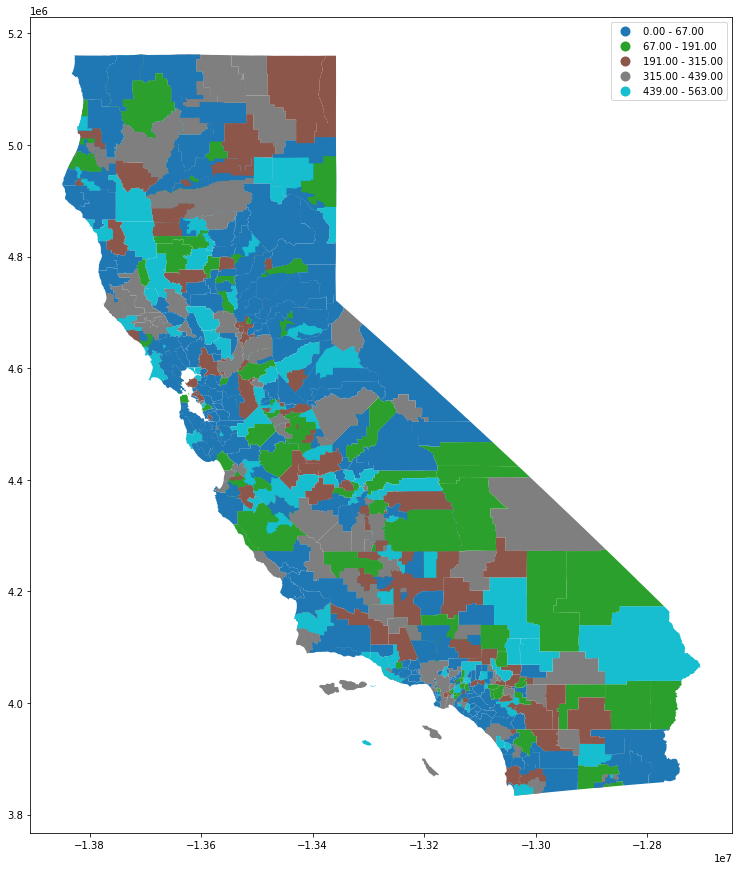

In [13]:
attributes.plot(
    column='concentration_grant',
    legend=True,
    figsize=(15, 15),
    scheme="fisher_jenks"
        )

need to create binary plot (non-null value for concentration grant & null) in following cell. Mapclassify?

## Merging grades

post-pivot variable: `g`

In [14]:
g = pd.read_csv("clean_data/grades.csv")

In [15]:
g

,District Code,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH
0,40246,17.6,-25.4,-0.7,-5.7,-0.9,-4.6,-1.3,2.0,NaN,1.8,-2.3,4.0,NaN,-8.2,-0.5,0.0,-1.5,-0.7,-18.1,18.0,56.9,-45.8,-89.7,36.9,56.7,-51.3,-21.1,-45.8,49.5,NaN,-6.2,-24.6,-76.9,39.5,-18.3,7.4,18.7,62.6,-44.9,-85.2,38.2,54.7,NaN,-22.9,-43.5,45.5,26.8,2.0,-24.0,-76.9,41.0,31.3,-40.4,-4.8,-0.8,-3.5,-4.5,-4.8,-17.6,NaN,-2.8,-30.8,5.1,NaN,-9.5,-4.1,-2.6,-6.0,-37.8,-62.7,-20.6,36.7,-79.3,-108.5,-1.7,14.9,-87.7,-61.3,-94.2,4.8,NaN,-52.9,-62.6,-113.2,1.3,-69.1,-22.3,-15.9,37.5,-75.7,-104.0,3.1,32.5,NaN,-58.5,-63.4,-0.4,-5.8,-43.4,-58.5,-110.7,7.3
1,40253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-53.8,-56.9,-24.5,44.3,-75.1,-114.1,7.4,31.5,-67.4,-58.9,-110.6,11.4,NaN,NaN,-60.0,-122.8,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.8,-100.3,-61.5,22.2,-104.9,-139.9,-29.7,-13.9,-122.5,-98.2,-150.9,-26.2,NaN,NaN,-99.6,-167.1,-13.7
2,61119,5.7,-29.1,4.0,-5.3,-1.1,2.7,5.2,13.9,NaN,4.1,-18.7,6.2,21.8,-0.5,6.9,7.3,6.7,-43.0,-14.8,36.8,48.6,-2.5,-42.0,43.5,29.8,NaN,5.0,-75.5,46.6,-27.3,55.0,-13.1,-73.1,60.8,-48.7,14.3,32.8,54.0,-1.4,-44.7,38.3,16.0,NaN,0.9,-56.7,40.4,-49.1,55.5,-20.0,-80.4,54.1,-1.1,-1.8,3.4,-1.2,-0.9,0.5,4.7,9.3,NaN,2.3,-20.1,5.6,5.9,1.3,3.6,5.0,3.8,-83.9,-51.8,14.3,43.6,-13.7,-42.4,17.8,-3.5,NaN,-24.4,-112.4,28.3,-77.2,27.8,-35.3,-99.5,29.8,-82.8,-50.0,10.8,44.8,-12.9,-42.9,13.0,-12.7,NaN,-26.7,-92.3,22.8,-83.0,26.5,-38.8,-104.5,26.0
3,61127,-21.8,NaN,-6.6,-0.8,-6.6,1.1,-7.1,14.7,NaN,-3.3,NaN,-4.9,NaN,-10.6,-12.1,-12.0,-11.4,-9.6,NaN,57.5,73.0,31.0,-11.4,60.9,38.0,NaN,25.6,NaN,53.9,NaN,60.9,14.5,-35.9,67.9,12.2,NaN,64.1,73.7,37.6,-12.5,68.0,23.3,NaN,28.9,NaN,58.8,NaN,71.4,26.6,-23.9,79.3,-18.3,NaN,-6.9,2.2,0.9,19.8,-9.7,34.6,NaN,-5.8,NaN,-8.1,NaN,-12.2,-9.2,-12.3,-13.2,-41.4,NaN,41.2,76.2,30.7,0.5,37.9,20.2,NaN,-2.7,NaN,32.4,NaN,52.2,0.5,-55.7,46.1,-23.1,NaN,48.1,74.0,29.7,-19.2,47.6,-14.4,NaN,3.1,NaN,40.5,NaN,64.4,9.7,-43.4,59.3
4,61143,8.6,NaN,12.3,4.2,5.4,-7.4,12.1,44.1,NaN,15.5,4.1,8.1,NaN,17.6,14.1,6.1,10.0,-64.9,62.3,32.2,28.5,-47.2,-82.8,43.5,62.5,-53.1,-5.3,-71.4,51.9,NaN,14.4,-33.0,-86.0,80.7,-73.5,NaN,20.0,24.3,-52.6,-75.4,31.4,18.4,NaN,-20.7,-75.4,43.8,NaN,-3.2,-47.1,-92.1,70.7,6.5,NaN,8.9,5.7,0.4,-12.1,9.5,53.4,NaN,9.7,12.7,10.9,NaN,15.2,10.0,3.3,3.5,-86.3,NaN,14.9,24.9,-52.9,-81.6,24.8,57.8,-52.8,-22.6,-86.2,33.4,NaN,-2.2,-50.2,-105.2,62.5,-92.8,NaN,6.1,19.2,-53.3,-69.5,15.2,4.4,NaN,-32.3,-98.9,22.4,NaN,-17.4,-60.2,-108.5,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Merge grades with attributes

In [16]:
attributes.shape

(944, 78)

In [17]:
g.shape

(901, 103)

In [18]:
944-901

43

We have 43 districts that do not have grade data. We can get a list of those later, if necessary.

In [19]:
attributes['District Code'] = [x[2:7] for x in attributes['CDSCode'].astype(str)]
# extracting the 'd' from cds codes
g['District Code'] = g['District Code'].astype(str)
# enabling merge (str with str)

In [20]:
test = attributes.merge(g, how='left', on='District Code', left_index=True)
# merging with grades

In [21]:
test
# this looks like it worked?

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,districtname,unduplicated_pupil_count,base_grant,supplemental_grant,concentration_grant,total_grants,cds,District Code,e_chan AA,e_chan AI,e_chan ALL,e_chan AS,e_chan EL,e_chan ELO,e_chan EO,e_chan FI,e_chan FOS,e_chan HI,e_chan HOM,e_chan MR,e_chan PI,e_chan RFP,e_chan SED,e_chan SWD,e_chan WH,e_curr AA,e_curr AI,e_curr ALL,e_curr AS,e_curr EL,e_curr ELO,e_curr EO,e_curr FI,e_curr FOS,e_curr HI,e_curr HOM,e_curr MR,e_curr PI,e_curr RFP,e_curr SED,e_curr SWD,e_curr WH,e_prio AA,e_prio AI,e_prio ALL,e_prio AS,e_prio EL,e_prio ELO,e_prio EO,e_prio FI,e_prio FOS,e_prio HI,e_prio HOM,e_prio MR,e_prio PI,e_prio RFP,e_prio SED,e_prio SWD,e_prio WH,m_chan AA,m_chan AI,m_chan ALL,m_chan AS,m_chan EL,m_chan ELO,m_chan EO,m_chan FI,m_chan FOS,m_chan HI,m_chan HOM,m_chan MR,m_chan PI,m_chan RFP,m_chan SED,m_chan SWD,m_chan WH,m_curr AA,m_curr AI,m_curr ALL,m_curr AS,m_curr EL,m_curr ELO,m_curr EO,m_curr FI,m_curr FOS,m_curr HI,m_curr HOM,m_curr MR,m_curr PI,m_curr RFP,m_curr SED,m_curr SWD,m_curr WH,m_prio AA,m_prio AI,m_prio ALL,m_prio AS,m_prio EL,m_prio ELO,m_prio EO,m_prio FI,m_prio FOS,m_prio HI,m_prio HOM,m_prio MR,m_prio PI,m_prio RFP,m_prio SED,m_prio SWD,m_prio WH
NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,0.335,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,"MULTIPOLYGON (((-13606221.352 4540862.002, -13...",10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1611190000000,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,0.304,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,"POLYGON ((-13612889.056 4565138.930, -13612894...",16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1611270000000,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated As

In [22]:
for col in test.columns: 
    print(col) 

OBJECTID
Year
FedID
CDCode
CDSCode
CountyName
DistrictNa
DistrictTy
GradeLow
GradeHigh
GradeLowCe
GradeHighC
AssistStat
CongressUS
SenateCA
AssemblyCA
LocaleDist
UpdateNote
EnrollTota
EnrollChar
EnrollNonC
AAcount
AApct
AIcount
AIpct
AScount
ASpct
FIcount
FIpct
HIcount
HIpct
MRcount
MRpct
PIcount
PIpct
WHcount
WHpct
NRcount
NRpct
ELcount
ELpct
FOScount
FOSpct
HOMcount
HOMpct
MIGcount
MIGpct
SWDcount
SWDpct
SEDcount
SEDpct
UPcount
UPpct
ELATested
ELAStdMetP
MathTested
MathStdMet
CCPrepCoho
CCPrepPct
AbsentElig
AbsentPct
GradCohort
GradPct
UCCSUReqMe
DropOutPct
EnrollCumu
SuspPct
SHAPE_Leng
SHAPE_Area
geometry
Unnamed: 0
districtname
unduplicated_pupil_count
base_grant
supplemental_grant
concentration_grant
total_grants
cds
District Code
e_chan AA
e_chan AI
e_chan ALL
e_chan AS
e_chan EL
e_chan ELO
e_chan EO
e_chan FI
e_chan FOS
e_chan HI
e_chan HOM
e_chan MR
e_chan PI
e_chan RFP
e_chan SED
e_chan SWD
e_chan WH
e_curr AA
e_curr AI
e_curr ALL
e_curr AS
e_curr EL
e_curr ELO
e_curr EO
e_cur

In [23]:
test.drop('Unnamed: 0', axis=1, inplace=True)

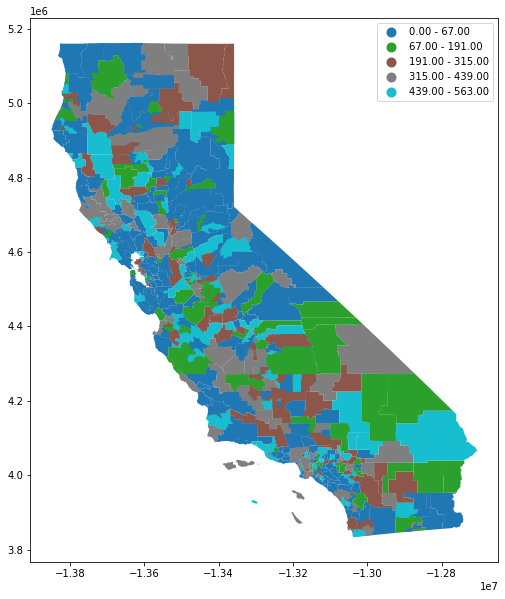

In [24]:
test.plot(column='concentration_grant',
    legend=True,
    figsize=(10, 10),
    scheme="fisher_jenks"
        )

In [25]:
test.to_file('clean_data/master.shp')